In [1]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [4]:
def data_preprocessing(train_data, test_data):
    # Normalize data
    train_data_normalized = (train_data - train_data.mean()) / train_data.std()
    test_data_normalized = (test_data - test_data.mean()) / test_data.std()
    
    return train_data_normalized, test_data_normalized

In [5]:
train_data = pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_train.csv')
test_data =  pd.read_csv('/Users/hetvishukla/Deep learning/project/fashion MNIST/fashion-mnist_test.csv')


In [56]:
train_data['label'].value_counts().sort_index(ascending=True)

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

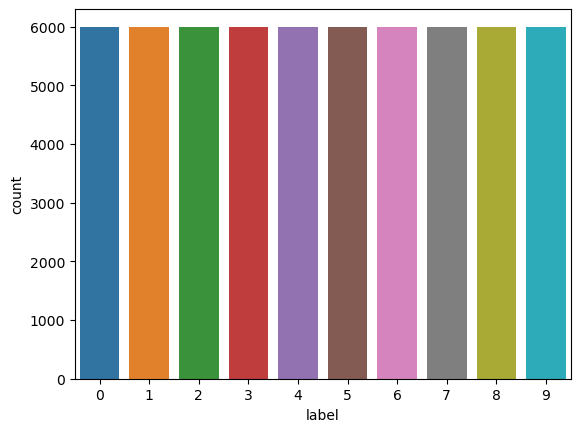

In [57]:
sns.countplot(x="label",data=train_data)

In [7]:

train_labels = train_data['label']
train_data.drop('label', axis=1, inplace=True)
test_labels = test_data['label']
test_data.drop('label', axis=1, inplace=True)

train_preprocess, test_preprocess = data_preprocessing(train_data, test_data)

combined_data = pd.concat([train_preprocess, train_preprocess], axis=0)

In [59]:
combined_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.009505,-0.022693,-0.028907,-0.041557,-0.057574,-0.070503,-0.098083,-0.155980,-0.238544,-0.377956,...,-0.601707,-0.476941,-0.395151,-0.406437,-0.440181,-0.396716,-0.287715,-0.158257,-0.091431,-0.033045
1,-0.009505,-0.022693,-0.028907,-0.041557,-0.057574,-0.070503,-0.098083,-0.155980,-0.238544,-0.377956,...,-0.601707,-0.476941,-0.395151,-0.406437,-0.440181,-0.396716,-0.287715,-0.158257,-0.091431,-0.033045
2,-0.009505,-0.022693,-0.028907,-0.041557,-0.057574,-0.070503,-0.098083,0.198797,-0.238544,-0.377956,...,-0.601707,-0.476941,-0.395151,0.275908,0.389446,-0.396716,-0.287715,-0.158257,-0.091431,-0.033045
3,-0.009505,-0.022693,-0.028907,0.366129,0.406796,-0.070503,-0.098083,-0.155980,-0.238544,-0.377956,...,-0.549575,-0.476941,-0.395151,-0.406437,-0.440181,-0.374567,-0.287715,-0.158257,-0.091431,-0.033045
4,-0.009505,-0.022693,-0.028907,-0.041557,-0.057574,-0.070503,-0.098083,-0.155980,-0.238544,-0.377956,...,-0.601707,-0.476941,-0.395151,-0.406437,-0.440181,-0.396716,-0.287715,-0.158257,-0.091431,-0.033045


In [60]:
combined_data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,120000.000000,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,...,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05
mean,1.539509e-18,-3.671137e-18,8.585725e-18,5.210647e-18,2.486900e-18,0.000000,1.965835e-17,1.042129e-17,-7.454778e-17,4.322468e-18,...,-3.457975e-17,3.079019e-17,-1.894781e-18,2.877698e-17,-8.763360e-18,-2.652693e-17,5.329071e-17,2.901383e-17,2.735590e-17,-7.756758e-18
std,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,0.999996,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,...,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01,9.999958e-01
min,-9.504800e-03,-2.269284e-02,-2.890668e-02,-4.155674e-02,-5.757412e-02,-0.070503,-9.808279e-02,-1.559799e-01,-2.385442e-01,-3.779558e-01,...,-6.017074e-01,-4.769411e-01,-3.951506e-01,-4.064373e-01,-4.401815e-01,-3.967160e-01,-2.877148e-01,-1.582570e-01,-9.143105e-02,-3.304529e-02
25%,-9.504800e-03,-2.269284e-02,-2.890668e-02,-4.155674e-02,-5.757412e-02,-0.070503,-9.808279e-02,-1.559799e-01,-2.385442e-01,-3.779558e-01,...,-6.017074e-01,-4.769411e-01,-3.951506e-01,-4.064373e-01,-4.401815e-01,-3.967160e-01,-2.877148e-01,-1.582570e-01,-9.143105e-02,-3.304529e-02
50%,-9.504800e-03,-2.269284e-02,-2.890668e-02,-4.155674e-02,-5.757412e-02,-0.070503,-9.808279e-02,-1.559799e-01,-2.385442e-01,-3.779558e-01,...,-6.017074e-01,-4.769411e-01,-3.951506e-01,-4.064373e-01,-4.401815e-01,-3.967160e-01,-2.877148e-01,-1.582570e-01,-9.143105e-02,-3.304529e-02
75%,-9.504800e-03,-2.269284e-02,-2.890668e-02,-4.155674e-02,-5.757412e-02,-0.070503,-9.808279e-02,-1.559799e-01,-2.385442e-01,-3.779558e-01,...,4.061952e-01,-2.927203e-01,-3.951506e-01,-4.064373e-01,-4.401815e-01,-3.967160e-01,-2.877148e-01,-1.582570e-01,-9.143105e-02,-3.304529e-02
max,1.689647e+02,1.328134e+02,1.848648e+02,6.681887e+01,5.264841e+01,39.338780,2.716855e+01,1.793762e+01,1.042500e+01,6.274007e+00,...,3.829589e+00,4.742647e+00,5.679227e+00,5.393495e+00,4.479704e+00,5.251201e+00,8.322828e+00,1.449889e+01,2.716101e+01,7.993421e+01


In [61]:
train_labels.info

<bound method Series.info of 0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64>

In [62]:
train_images = train_data.values.reshape(-1,28,28)
test_images = test_data.values.reshape(-1,28,28)
train_images.shape

(60000, 28, 28)

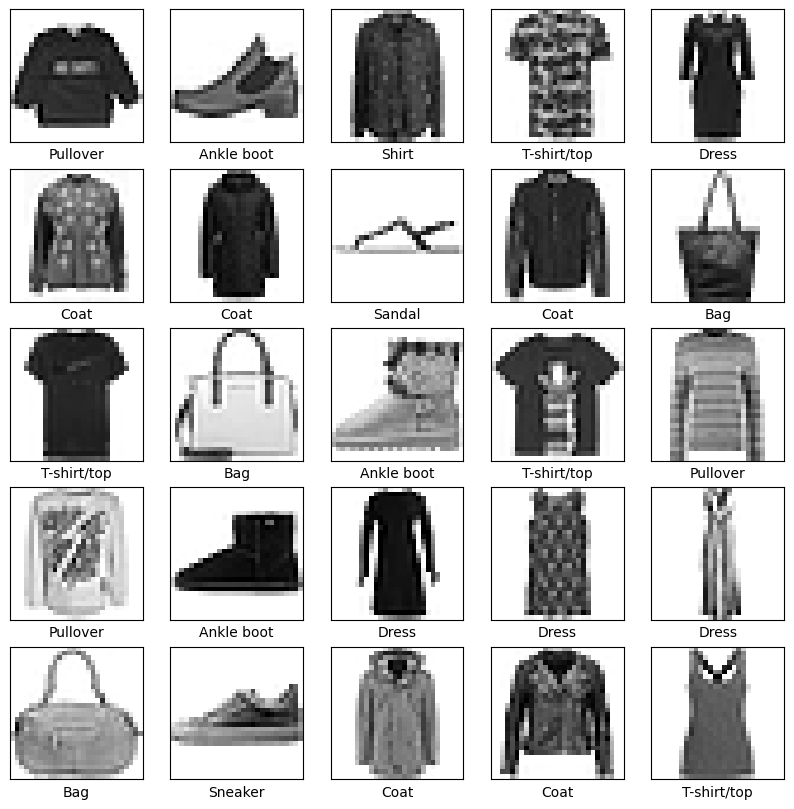

In [63]:
# Display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

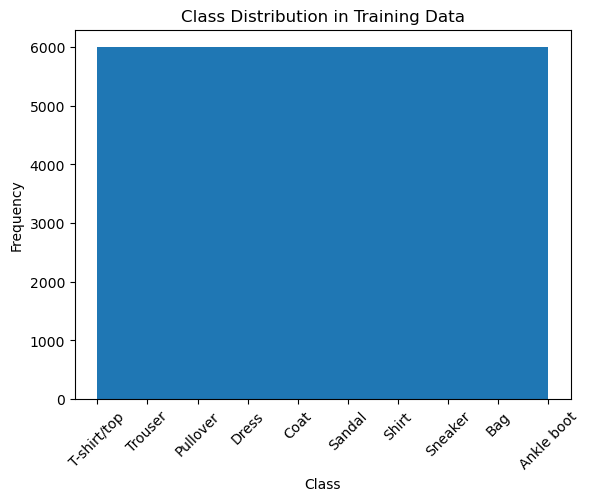

In [64]:
plt.figure()
plt.hist(train_labels, bins=len(class_names))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Data')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.show()

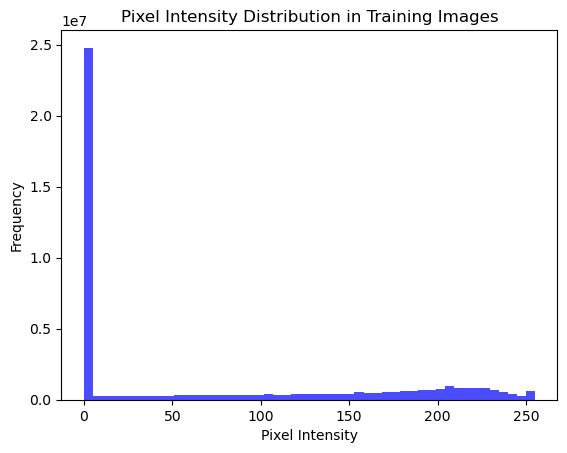

In [65]:
# Image pixel intensity distribution analysis
plt.figure()
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution in Training Images')
plt.show()

In [3]:
# def data_analysis(dataset):
#     # here we can do full analysis about out
    
#     class_count = np.bincount(dataset.targets)
#     plt.bar(np.arange(10), class_count, tick_label=np.arange(10))
#     plt.xlabel('Class')
#     plt.ylabel('Count')
#     plt.title('Distribution of Classes')
#     plt.show()
    
#     # Box plot of pixel values
#     plt.boxplot(dataset.data.numpy().reshape(-1))
#     plt.title('Box plot of Pixel Values')
#     plt.show()


In [26]:
# Data preprocessing (scaling or normalization)

# def data_preprocessing(train_data, test_data):
#     # Convert to torch tensors
#     train_tensor = train_data #torch.tensor(train_data.values, dtype=torch.float32)
#     test_tensor = test_data #torch.tensor(test_data.values, dtype=torch.float32)
    
#     # Normalize data
#     train_tensor = (train_tensor - train_tensor.mean()) / train_tensor.std()
#     test_tensor = (test_tensor - test_tensor.mean()) / test_tensor.std()
    
#     return train_tensor, test_tensor

In [82]:
def train_model_with_cv(model, criterion, optimizer, train_loader, test_loader, num_epochs=100):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_train_corrects = 0
        running_test_loss = 0.0
        running_test_corrects = 0
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            running_train_corrects += torch.sum(preds == labels.data)

        epoch_train_loss = running_train_loss / len(train_loader)
        train_losses.append(epoch_train_loss)
        epoch_train_acc = running_train_corrects.double() / len(train_loader.dataset)
        train_accs.append(epoch_train_acc)

        model.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item()
                running_test_corrects += torch.sum(preds == labels.data)

        epoch_test_loss = running_test_loss / len(test_loader)
        test_losses.append(epoch_test_loss)
        epoch_test_acc = running_test_corrects.double() / len(test_loader.dataset)
        test_accs.append(epoch_test_acc)

        # print(f'Epoch [{epoch + 1}/{num_epochs}], '
        #       f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, '
        #       f'Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_acc:.4f}')

    return train_losses, test_losses, train_accs, test_accs

In [67]:
# # Training model function with k-fold cross-validation
# def train_model_with_cv(model, criterion, optimizer, train_loader, test_loader, num_epochs=100):
#     train_losses = []
#     test_losses = []
#     for epoch in range(num_epochs):
#         running_train_loss = 0.0
#         running_test_loss = 0.0
#         model.train()
#         for i, data in enumerate(train_loader, 0):
#             inputs, labels = data
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_train_loss += loss.item()
#         train_loss = running_train_loss / len(train_loader)
#         train_losses.append(train_loss)
        
#         model.eval()
#         with torch.no_grad():
#             for data in test_loader:
#                 inputs, labels = data
#                 outputs = model(inputs)
#                 loss = criterion(outputs, labels)
#                 running_test_loss += loss.item()
#             test_loss = running_test_loss / len(test_loader)
#             test_losses.append(test_loss)
        
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
#     return train_losses, test_losses


In [78]:
# ANN model with batch normalization
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [79]:

train_tensor = torch.tensor(train_data.values, dtype=torch.float32)
test_tensor =  torch.tensor(test_data.values, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels.values)
test_labels_tensor = torch.tensor(test_labels.values)

train_labels.describe()

print("Train images shape:", train_tensor.shape)
print("Train labels length:", len(train_labels_tensor))
print("Test images shape:", test_tensor.shape)
print("Test labels length:", len(test_labels_tensor))


# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# data_analysis(combined_data)

Train images shape: torch.Size([60000, 784])
Train labels length: 60000
Test images shape: torch.Size([10000, 784])
Test labels length: 10000


In [10]:
from tensorflow import keras
y_train = keras.utils.to_categorical(train_labels, 10)


y_test = keras.utils.to_categorical(test_labels, 10)

print("Train set:", train_data.shape, test_data.shape)
print("Validation set:", y_train.shape, y_test.shape)
print("Test set:", train_labels.shape, test_labels.shape)

Train set: (60000, 784) (10000, 784)
Validation set: (60000, 10) (10000, 10)
Test set: (60000,) (10000,)


In [8]:
print("Train set:", train_data.shape, test_data.shape)
print("Validation set:", train_labels.shape, test_labels.shape)
print("Test set:", train_labels.shape, test_labels.shape)


Train set: (60000, 784) (10000, 784)
Validation set: (60000,) (10000,)
Test set: (60000,) (10000,)


Fold 1


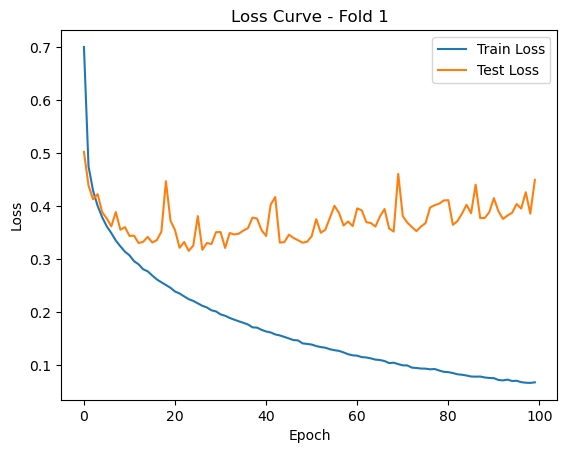

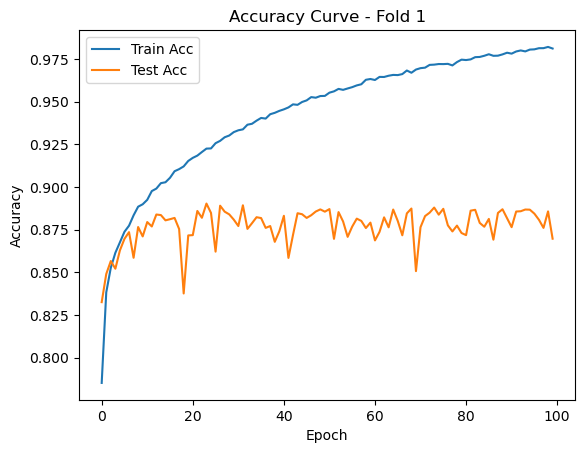

Fold 2


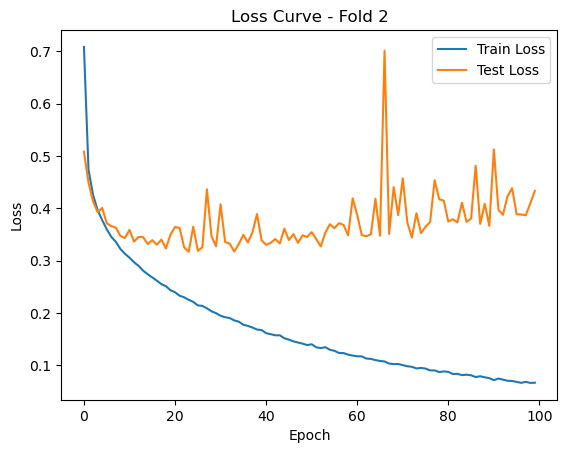

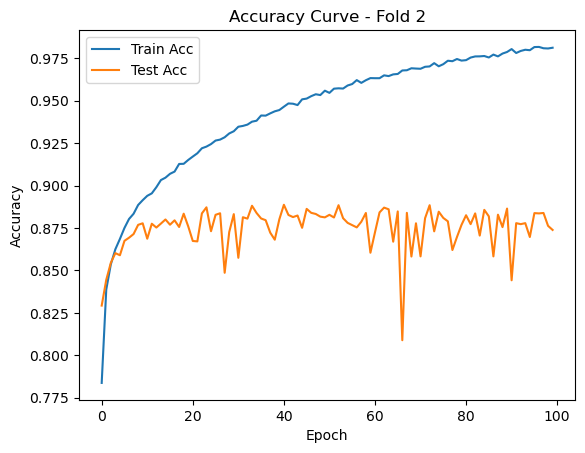

Fold 3


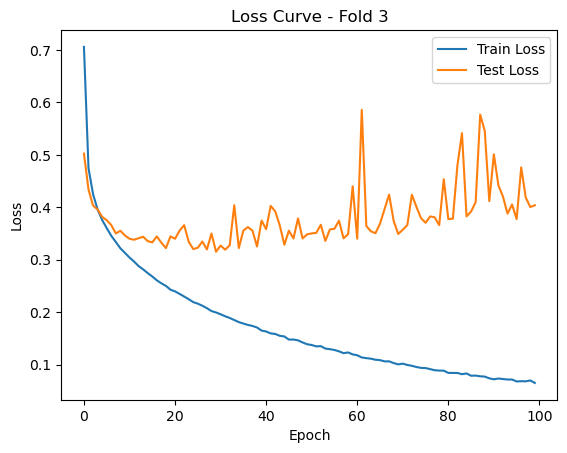

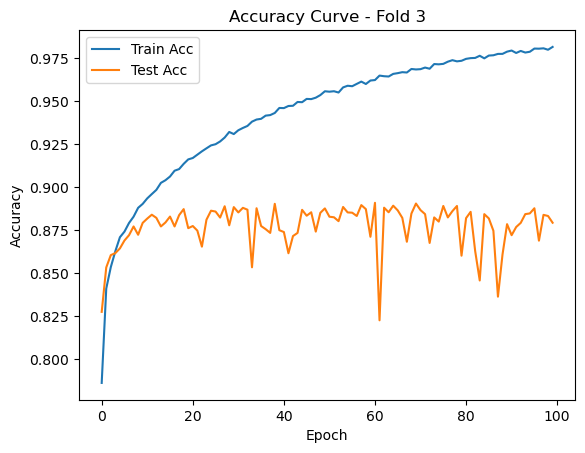

Fold 4


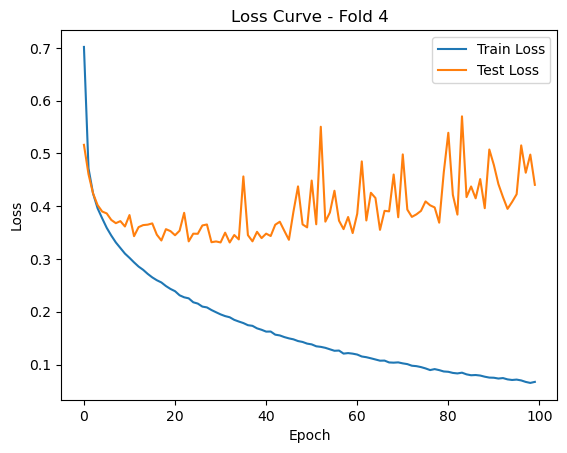

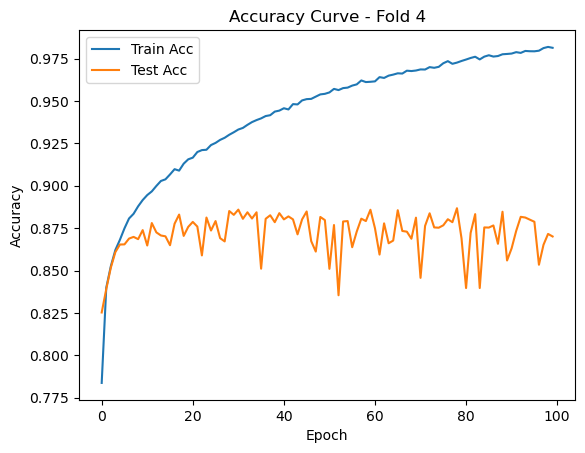

Fold 5


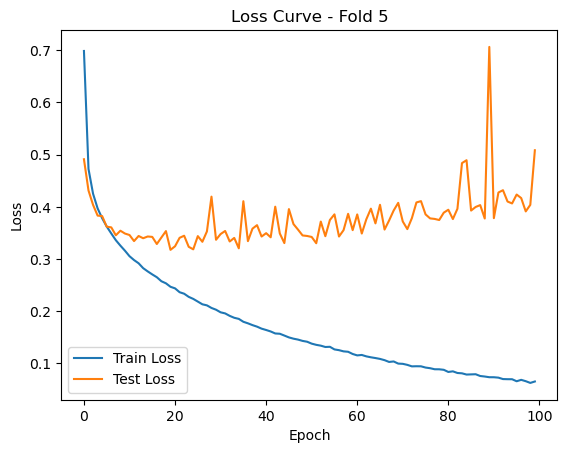

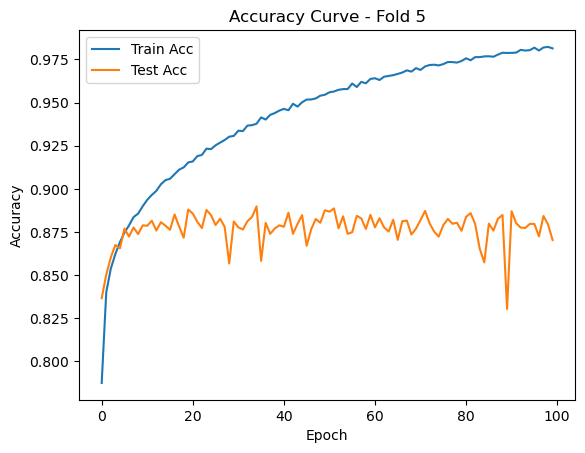

In [83]:
# Step 8: Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

fold = 0
for train_index, test_index in kf.split(train_tensor):
    fold += 1
    print(f"Fold {fold}")
    train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
    train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

    # Step 9: Initialize ANN model
    input_size = train_tensor.shape[1]
    hidden_size = 128
    num_classes = 10
    model = ANN(input_size, hidden_size, num_classes)

    # Step 10: Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Step 11: Convert to DataLoader
    train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Step 12: Train the model with k-fold cross-validation
    train_losses, test_losses, train_accs, test_accs = train_model_with_cv(model, criterion, optimizer,
                                                                         train_loader, val_loader, num_epochs=100)

    # Step 13: Plot loss and accuracy curves
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - Fold {fold}')
    plt.legend()
    plt.show()

    plt.plot(train_accs, label='Train Acc')
    plt.plot(test_accs, label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - Fold {fold}')
    plt.legend()
    plt.show()

In [73]:
# # Step 7: Perform k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True)

# # Step 8: Iterate over folds
# fold = 0
# for train_index, test_index in kf.split(train_tensor):
#     fold += 1
#     print(f"Fold {fold}")
#     train_data_fold, val_data_fold = train_tensor[train_index], train_tensor[test_index]
#     train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

#     # Step 9: Initialize ANN model
#     input_size = train_tensor.shape[1]
#     hidden_size = 128
#     num_classes = 10
#     model = ANN(input_size, hidden_size, num_classes)

#     # Step 10: Loss function and optimizer
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.SGD(model.parameters(), lr=0.01)

#     # Step 11: Convert to DataLoader
#     train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
#     val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)
#     val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

#     # Step 12: Train the model with cross-validation
#     train_losses, val_losses = train_model_with_cv(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)

#     # Step 13: Plot loss curves
#     plt.plot(train_losses, label='Train')
#     plt.plot(val_losses, label='Validation')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(f'Train and Validation Losses - Fold {fold}')
#     plt.legend()
#     plt.show()

#     # Step 14: Test the model
#     test_dataset = torch.utils.data.TensorDataset(test_tensor)
#     test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
#     model.eval()
#         with torch.no_grad():
#             for inputs, labels in test_loader:
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)
#                 running_test_loss += loss.item()
#                 running_test_corrects += torch.sum(preds == labels.data)
    
#         epoch_test_loss = running_test_loss / len(test_loader)
#         test_losses.append(epoch_test_loss)
#         epoch_test_acc = running_test_corrects.double() / len(test_loader.dataset)
#         test_accs.append(epoch_test_acc)
    
#         print(f'Epoch [{epoch + 1}/{num_epochs}], '
#               f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f}, '
#               f'Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_acc:.4f}')

IndentationError: unexpected indent (2478951044.py, line 44)

In [ ]:
#  # Step 6: Initialize ANN model
# input_size = train_tensor.shape[1]
# hidden_size = 128
# num_classes = 10
# model = ANN(input_size, hidden_size, num_classes)

# # Step 7: Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # Step 8: Train the model using k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True)
# fold = 0
# for train_index, test_index in kf.split(train_data_tensor):
#     fold += 1
#     print(f"Fold {fold}")
#     train_data_fold, val_data_fold = train_data_tensor[train_index], train_data_tensor[test_index]
#     train_labels_fold, val_labels_fold = train_labels_tensor[train_index], train_labels_tensor[test_index]

#     train_dataset = torch.utils.data.TensorDataset(train_data_fold, train_labels_fold)
#     val_dataset = torch.utils.data.TensorDataset(val_data_fold, val_labels_fold)

#     train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
#     val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

#     losses = train_model(model, criterion, optimizer, train_loader, num_epochs=10)

#     # Plot loss curve
#     plt.plot(losses)
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(f'Training Loss Curve - Fold {fold}')
#     plt.show()

# # Step 9: Test the model
# test_dataset = torch.utils.data.TensorDataset(test_data_tensor, test_labels_tensor)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# model.eval()
# correct = 0
# total = 0
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# accuracy = 100 * correct / total
# print(f'Accuracy on test set: {accuracy:.2f}%')

In [ ]:
# # # Data analysis
# # data_analysis(trainset)

# # # Data preprocessing
# # data_preprocessing(trainset)
# # data_preprocessing(testset)

# # Initialize k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True)
# fold = 0
# for train_index, test_index in kf.split(trainset):
#     fold += 1
#     print(f"Fold {fold}")
#     train_data, val_data = torch.utils.data.random_split(trainset, [len(train_index), len(test_index)])
#     train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
#     val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
    
#     # Initialize ANN model
#     input_size = 28 * 28
#     hidden_size = 128
#     num_classes = 10
#     model = ANN(input_size, hidden_size, num_classes)
    
#     # Loss function and optimizer
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.SGD(model.parameters(), lr=0.01)
    
#     # Train the model with cross-validation
#     train_losses, val_losses = train_model_with_cv(model, criterion, optimizer, train_loader, val_loader, num_epochs=10)
    
#     # Plot train and validation loss curves
#     plt.plot(train_losses, label='Train')
#     plt.plot(val_losses, label='Validation')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title(f'Train and Validation Losses - Fold {fold}')
#     plt.legend()
#     plt.show()
    
#     # Test the model on the test set
#     test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for data in test_loader:
#             images, labels = data
#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     accuracy = 100 * correct / total
#     print(f'Accuracy on test set: {accuracy:.2f}%')